# "Birds Migration Patterns"
> "The case study consists of analysis of migration patterns of three birds - "Eric", "Nico", "Sanne"."

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [fastpages, jupyter]
<!-- - image: images/some_folder/your_image.png -->
- hide: false
- search_exclude: true
<!-- - metadata_key1: metadata_value1 -->
<!-- - metadata_key2: metadata_value2 -->

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

birddata = pd.read_csv("bird_tracking.csv", index_col=0)
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [3]:
birddata.info

<bound method DataFrame.info of        altitude               date_time  device_info_serial   direction  \
0            71  2013-08-15 00:18:08+00                 851 -150.469753   
1            68  2013-08-15 00:48:07+00                 851 -136.151141   
2            68  2013-08-15 01:17:58+00                 851  160.797477   
3            73  2013-08-15 01:47:51+00                 851   32.769360   
4            69  2013-08-15 02:17:42+00                 851   45.191230   
...         ...                     ...                 ...         ...   
61915        11  2014-04-30 22:00:08+00                 833   45.448157   
61916         6  2014-04-30 22:29:57+00                 833 -112.073055   
61917         5  2014-04-30 22:59:52+00                 833   69.989037   
61918        16  2014-04-30 23:29:43+00                 833   88.376373   
61919         9  2014-04-30 23:59:34+00                 833  149.949008   

        latitude  longitude  speed_2d bird_name  
0      49.419860 

In [4]:
birddata.tail()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne
61919,9,2014-04-30 23:59:34+00,833,149.949008,51.354474,3.181057,0.485489,Sanne


The data consists of almost **62,000** data points and 9 features or columns

In [5]:
birddata.bird_name.value_counts()

Nico     21121
Sanne    21004
Eric     19795
Name: bird_name, dtype: int64

There are **3 types of birds** in our dataset, named *Nico*, *Sanne*, *Eric*

Linear estimation - because the earth is not flat - of flight trajectory of bird migration of a particular bird **"Eric"**. The trajectory will be substantially distorted because we have not done any *Cartographic Projection* of the flight trajectory.

This plot is just to get a rought look at the flight trajectory of a bird

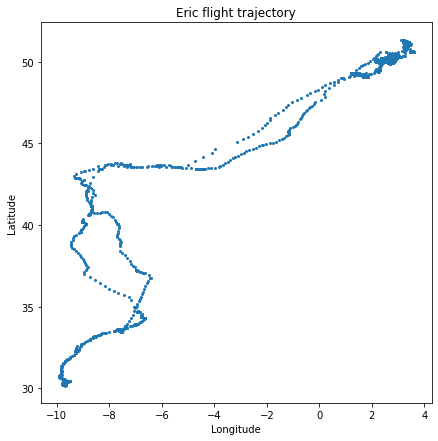

In [6]:
ind = birddata.bird_name == "Eric"
x, y = birddata.longitude[ind], birddata.latitude[ind]
plt.figure(figsize=(7,7))
plt.plot(x, y, "o", ms=2)
plt.savefig("Eric_migration_2D_traj.pdf")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Eric flight trajectory")
plt.show()

Let's plot the flight trajectory for all of three birds

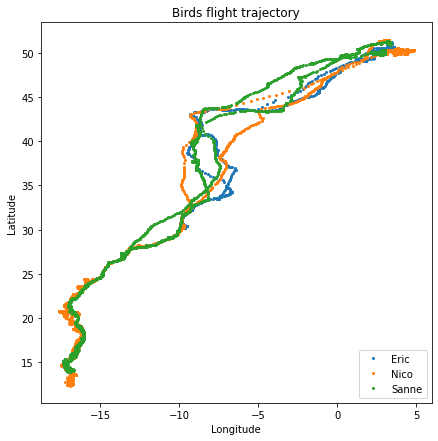

In [7]:
birds = birddata.bird_name.unique()
plt.figure(figsize=(7,7))
for bird in birds:
    ind = birddata.bird_name == bird
    x, y = birddata.longitude[ind], birddata.latitude[ind]
    plt.plot(x, y, "o", ms=2, label=bird)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Birds flight trajectory")
plt.legend(loc="lower right")
plt.savefig("birds_flight_traj.pdf")
plt.show()

To further proceed, we would like to chech if our data consists of **missing values** and handle them accordingly
We'll be using sklearn for the preprocessing of the data and handling the missing values

In [8]:
birddata.isnull().sum()

altitude                0
date_time               0
device_info_serial      0
direction             443
latitude                0
longitude               0
speed_2d              443
bird_name               0
dtype: int64

Two columns *direction* and *speed_2d* consists of same no. of missing values but for **direction** column **mean is not an appropriate approximation**. Therefor we'll first impute **speed_2d** with mean and then we'll use **n_neighbours strategy** for imputation of **direction**

In [9]:
from sklearn.impute import SimpleImputer, KNNImputer
# default args are what we want i.e. missing_values=nan, strategy='mean'
imputer = SimpleImputer()
birddata["speed_2d"] = imputer.fit_transform(birddata[['speed_2d']])

In [10]:
birddata.isnull().sum()

altitude                0
date_time               0
device_info_serial      0
direction             443
latitude                0
longitude               0
speed_2d                0
bird_name               0
dtype: int64

Let's impute the **direction** column with default args

In [11]:
imputer = KNNImputer()
imputer.fit(birddata.loc[:, 'direction':'speed_2d'])
birddata.loc[:, 'direction':'speed_2d'] = imputer.transform(birddata.loc[:, 'direction':'speed_2d'])

In [12]:
birddata.tail()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne
61919,9,2014-04-30 23:59:34+00,833,149.949008,51.354474,3.181057,0.485489,Sanne


Ommit the last row as it's unnecessarily introduced into the dataset.

In [13]:
birddata = birddata.iloc[:-1, :]
birddata.tail()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
61914,-10,2014-04-30 21:29:45+00,833,-10.057916,51.352661,3.177122,5.531148,Sanne
61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne


In [14]:
birddata.isnull().sum()

altitude              0
date_time             0
device_info_serial    0
direction             0
latitude              0
longitude             0
speed_2d              0
bird_name             0
dtype: int64

Let's try plotting a *histogram* of *speed_2d* for a particular bird **Eric** 

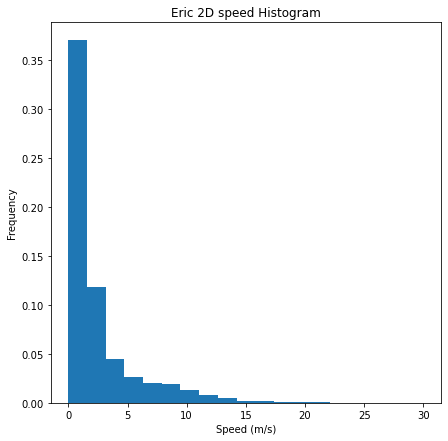

In [15]:
# ind is already defined above for "Eric"
speed = birddata.speed_2d[ind]
plt.figure(figsize=(7,7))
plt.hist(speed, bins=np.linspace(0,30,20), density=True)
plt.title("Eric 2D speed Histogram")
plt.xlabel("Speed (m/s)")
plt.ylabel("Frequency")
plt.savefig("Eric_2D_speed_hist.pdf")
plt.show()

Notice that in our dataset we have a column that consists of datetime, so lets check what is the datatype of this column

In [16]:
type(birddata.date_time[0])

str

In [17]:
birddata.date_time[0]

'2013-08-15 00:18:08+00'

datetime in our dataset is in str format and to be able to perform computation - computing time interval between two data points - on datetime we would like it convert to a datetime object

In [18]:
import datetime as dt
# remove '+00 from the strings as the time is already in UTC'
timestamps = birddata.date_time
timestamps = [stamp[:-3] for stamp in timestamps]

In [19]:
timestamps[:3]

['2013-08-15 00:18:08', '2013-08-15 00:48:07', '2013-08-15 01:17:58']

In [20]:
# convert str to a datetime object to be able to perform arithmetic operation on it
timestamps = list(map(lambda str_stamp: dt.datetime.strptime(
    str_stamp, "%Y-%m-%d %H:%M:%S"), timestamps))

In [21]:
birddata["timestamp"] = pd.Series(timestamps, index=birddata.index)

<ipython-input-21-c00b406e24ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birddata["timestamp"] = pd.Series(timestamps, index=birddata.index)


In [22]:
birddata.tail()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
61914,-10,2014-04-30 21:29:45+00,833,-10.057916,51.352661,3.177122,5.531148,Sanne,2014-04-30 21:29:45
61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne,2014-04-30 22:00:08
61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne,2014-04-30 22:29:57
61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne,2014-04-30 22:59:52
61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne,2014-04-30 23:29:43


In [23]:
birddata.timestamp[0]

Timestamp('2013-08-15 00:18:08')

In [24]:
birddata.timestamp[4] - birddata.timestamp[3]

Timedelta('0 days 00:29:51')

Now that we have our timestamp in place, we'd like to see how often or when the data was collected in the process. Also for this we'll limit ourselves to *Eric*

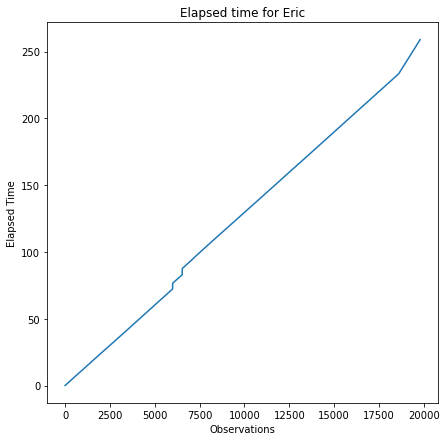

In [25]:
times = birddata.timestamp[birddata.bird_name == "Eric"]
elapsed_time = [time - times[0] for time in times]
plt.figure(figsize=(7,7))
plt.plot(np.array(elapsed_time) / dt.timedelta(days=1))
plt.xlabel("Observations")
plt.ylabel("Elapsed Time")
plt.title("Elapsed time for Eric")
plt.savefig("Eric_elapsed_time.pdf")
plt.show()

Our next goal is to find when does "Eric" migrate. To achieve that we'll **plot the daily mean speed** of Eric. The data is recorded unevenly i.e. on some days data was collected more times and some days it was collected less no. of times. We'll start by getting indices of speed_2d that were collected on the same day and then take mean of those speeds, followed by plotting them to see if there's any pattern.

In [26]:
data = birddata[birddata.bird_name == "Eric"]
elapsed_days = np.array(elapsed_time) / dt.timedelta(days=1)
daily_mean_speed = []
next_day = 1
inds = []
for i,t in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []

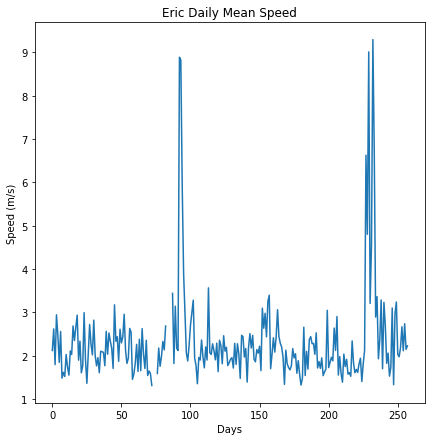

In [27]:
plt.figure(figsize=(7,7))
plt.plot(daily_mean_speed)
plt.xlabel("Days")
plt.ylabel("Speed (m/s)")
plt.title("Eric Daily Mean Speed")
plt.savefig("Eric_daily_mean_speed.pdf")
plt.show()

# Migration Pattern

from the 2D-Speed of *Eric* it can be argued that during days **90 - 100** and **230 - 240**, speed of *Eric* was **significantly higher** than other days. So it can be said that *Eric* migrated during those days. To corroborate our beliefs about the migration we would like to look at the place at which *Eric* ended up during those days.

# Cartographic Projection using Cartopy

Earlier we tried plotting migration pattern of birds but it was not quite what we were looking for because it was not a cartographic projection. So now we'll use *Cartopy* for *cartographic projection* of flight patterns of the birds. 

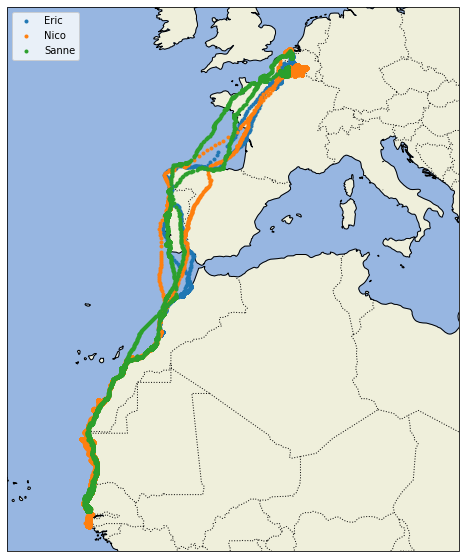

In [36]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.Mercator()

plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':', alpha = 0.95)

for bird in birds:
    ix = birddata["bird_name"] == bird
    x, y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x,y, '.', transform=ccrs.Geodetic(), label=bird)
    
plt.legend(loc="upper left")
plt.savefig("map.pdf")
plt.show()

# Analysis for each bird

We'll now group the data by **bird_name** to get the **average 2D speed** of the birds

In [56]:
data = birddata.groupby('bird_name')
names = pd.Series(birds, name="Bird Name")
mean_speeds = data.speed_2d.mean()
data.speed_2d.describe().set_index(names)

,count,mean,std,min,25%,50%,75%,max
Bird Name,,,,,,,,
Eric,19795.0,2.301654,3.558977,0.0,0.344819,1.012719,2.511553,63.488066
Nico,21121.0,2.906855,3.726812,0.0,0.490408,1.560000,3.701148,48.381510
Sanne,21003.0,2.451794,3.366275,0.0,0.411096,1.174564,2.823376,57.201748


In [57]:
mean_altitudes = data.altitude.mean()
data.altitude.describe().set_index(names)

,count,mean,std,min,25%,50%,75%,max
Bird Name,,,,,,,,
Eric,19795.0,60.249406,115.333013,-830.0,7.0,26.0,106.0,4808.0
Nico,21121.0,67.900478,153.498842,-965.0,2.0,16.0,112.0,6965.0
Sanne,21003.0,29.160882,133.453211,-1010.0,1.0,8.0,22.0,6145.0


## Mean Altitude at each day

We'll now group our data by each date to get the mean altitude of each day

In [63]:
# Convert date_time to pd.datetime objects
birddata.date_time = pd.to_datetime(birddata.date_time)
birddata["date"] = birddata.date_time.dt.date
grouped_bydates = birddata.groupby("date")
mean_altitudes_perday = grouped_bydates.altitude.mean()
mean_altitudes_perday

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-63-975ec523ff9b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birddata["date"] = birddata.date_time.dt.date


date
2013-08-15    134.092000
2013-08-16    134.839506
2013-08-17    147.439024
2013-08-18    129.608163
2013-08-19    180.174797
                 ...    
2014-04-26     15.118012
2014-04-27     23.897297
2014-04-28     37.716867
2014-04-29     19.244792
2014-04-30     13.982857
Name: altitude, Length: 259, dtype: float64

In [65]:
grouped_birdday = birddata.groupby(["bird_name", "date"])
mean_altitudes_perday = grouped_birdday.altitude.mean()

mean_altitudes_perday.head()

bird_name  date      
Eric       2013-08-15     74.988095
           2013-08-16    127.773810
           2013-08-17    125.890244
           2013-08-18    121.353659
           2013-08-19    134.928571
Name: altitude, dtype: float64

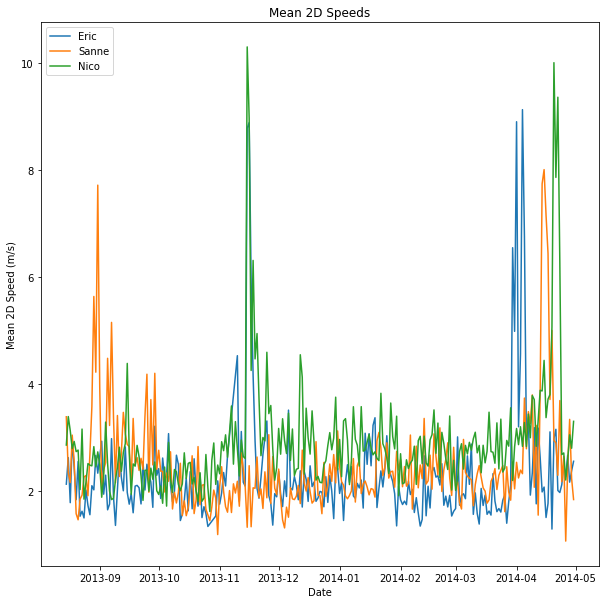

In [69]:
import matplotlib.pyplot as plt

eric_daily_speed  = grouped_birdday.speed_2d.mean()["Eric"]
sanne_daily_speed = grouped_birdday.speed_2d.mean()["Sanne"]
nico_daily_speed  = grouped_birdday.speed_2d.mean()["Nico"]

plt.figure(figsize=(10,10))
eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.xlabel("Date")
plt.ylabel("Mean 2D Speed (m/s)")
plt.title("Mean 2D Speeds")
plt.legend(loc="upper left")
plt.savefig("mean_2d_speed.pdf")
plt.show()